In [1]:
!pip install Pillow

In [163]:
from PIL import Image
import numpy as np
from scipy import linalg as sla
import numpy.linalg as la
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt

%matplotlib inline

# Module 3 Lecture 1 Notebook
Exploring SVD and low rank approximation.

## Visualizing SVD
Below we use python to help us visualize the effects of a matrix $A$ on the unit circle.

In [160]:
np.random.seed(10)
A=np.random.rand(2,2)
print(A)
U,Sig,VT=la.svd(A)
V=VT.T
v1=V[:,0]
v2=V[:,1]

v1_=VT@v1
v2_=VT@v2

_v1=np.diag(Sig)@VT@v1
_v2=np.diag(Sig)@VT@v2

y1=U@np.diag(Sig)@VT@v1
y2=U@np.diag(Sig)@VT@v2

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]]


(-2.2000000000000006, 2.2000000000000006)

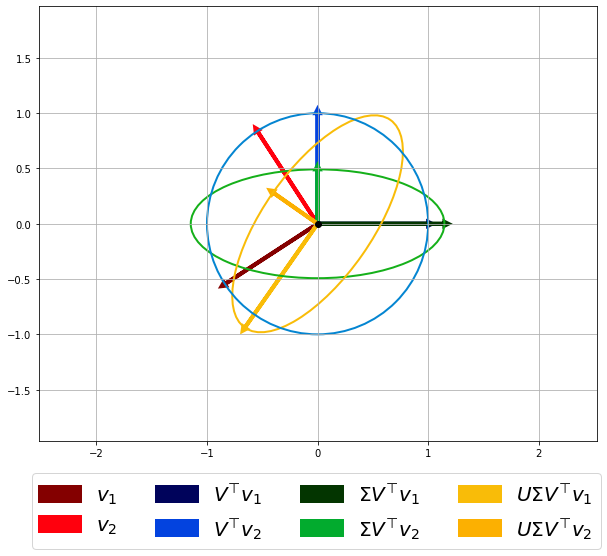

In [161]:

plt.figure(figsize=(10,8))
ax = plt.gca()
#plt.plot(0,0,'ok', markersize=10)
plt.grid(True, which='major') 

cols=['xkcd:dark red', 'xkcd:bright red', 'xkcd:dark blue', 'xkcd:blue', 'xkcd:dark green', 'xkcd:kelly green', 'xkcd:golden rod', 'xkcd:yellow orange']

M=np.vstack((np.vstack((np.vstack((np.vstack((v1,v2)),np.vstack((v1_,v2_)))),np.vstack((_v1,_v2)))),np.vstack((y1,y2))))
maxes = 1.1*np.amax(abs(M), axis = 0)

for i,l in enumerate(range(0,len(cols))):
    plt.arrow(0,0,M[i,0],M[i,1],head_width=0.035,head_length=0.035,color = cols[i],linewidth=4)

ellipse = Ellipse(xy=(0,0), width=2*_v1[0], height=2*_v2[1],  edgecolor='xkcd:green', fc='None', lw=2)
ax.add_patch(ellipse)

ellipse = Ellipse(xy=(0,0), width=2*_v1[0], height=2*_v2[1],  edgecolor='xkcd:golden rod', fc='None', lw=2, angle=55)
ax.add_patch(ellipse)

circle = plt.Circle((0, 0), radius=1, fc='None', edgecolor='xkcd:cerulean', lw=2)
plt.gca().add_patch(circle)

plt.legend([r'$v_1$',r'$v_2$',r'$V^\top v_1$',r'$V^\top v_2$',r'$\Sigma V^\top v_1$',
            r'$\Sigma V^\top v_2$',r'$U\Sigma V^\top v_1$',r'$U\Sigma V^\top v_2$'], fontsize=20, ncol=4, loc=0, bbox_to_anchor=(1.025,-0.05))
plt.plot(0,0,'ok') #<-- plot a black point at the origin
plt.axis('equal')  #<-- set the axes to the same scale
plt.xlim([-2*maxes[0],2*maxes[0]]) #<-- set the x axis limits
plt.ylim([-2*maxes[1],2*maxes[1]]) #<-- set the y axis limits
#plt.show()

## Matrix Reconstruction and Data compression
Credit in part: [link](https://dustinstansbury.github.io/theclevermachine/svd-data-compression)

First off, what do we mean by low-rank approximation? Say you have an $m\times n$ matrix $A$. The data in $A$
could be anything. For example, 
- Image data (each entry in the matrix is some pixel intensity value at a location
- ML: data could be observations and each column is some measurable set of features
- Computer vision: could be a video combining both things above

No matter the type of information $A$ encodes, it will have a matrix rank $r$, which is
the number of linearly independent columns (column rank) or rows (row rank) contained in the matrix.



Text(0.5, 0.98, 'Low-Rank Approximation of a Matrix')

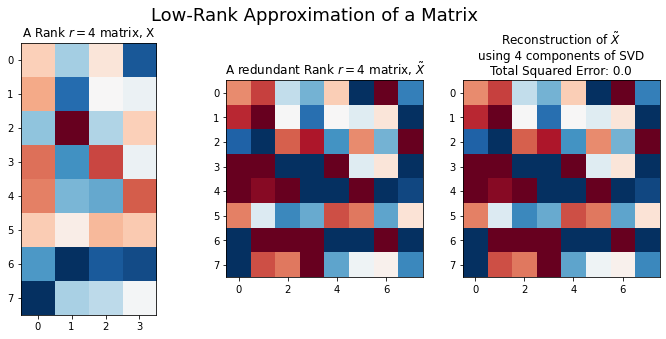

In [177]:
plt.rcParams['image.cmap'] = 'RdBu_r'
np.random.seed(12)

r = 4

# Create a random matrix, which will have independent columns and thus a rank equal to the number of columns
X_orig = np.random.randn(8, r)
X_orig_rank = la.matrix_rank(X_orig)

# Create a new redundant matrix with twice as many columns, but new columns are
# simply a linear scaling of original matrix
X_redundant = np.hstack([-2 * X_orig, 2 * X_orig])

# Permute columns of redundant matrix
X_redundant = X_redundant[:, np.random.permutation(np.arange(X_redundant.shape[1]))]
X_redundant_rank = la.matrix_rank(X_redundant)

# Run SVD on redundant matrix, we'll use this for LRA
U, S, V = la.svd(X_redundant)

# Low-rank reconstruction (exact in this case)
k=r
X_redundant_reconstructed = U[:, :k] * S[:k] @ V[:k, :]
reconstruction_error = np.sum((X_redundant - X_redundant_reconstructed) ** 2)

# Visualizations
## Original matrix
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.sca(axs[0])
plt.imshow(X_orig)
plt.clim([-2, 2])
plt.title(f"A Rank $r=${X_orig_rank} matrix, X")

## Redundant matrix
plt.sca(axs[1])
plt.imshow(X_redundant)
plt.clim([-2, 2])
plt.title(f"A redundant Rank $r=${X_redundant_rank} matrix, $\\tilde X$")

## Low-rank approximation (exact reconstruction)
plt.sca(axs[2])
plt.imshow(X_redundant_reconstructed)
plt.clim([-2, 2])
plt.title(f"Reconstruction of $\\tilde X$\nusing {MATRIX_RANK} components of SVD\nTotal Squared Error: {reconstruction_error:1.1f}")
plt.suptitle("Low-Rank Approximation of a Matrix", fontsize=18)

Play around with the random seed and the matrix rank to explore the visualization. You can also choose a larger matrix rank, and then a non-exact low rank approximation.

Text(0.5, 0.98, 'Different between original and low rank approx')

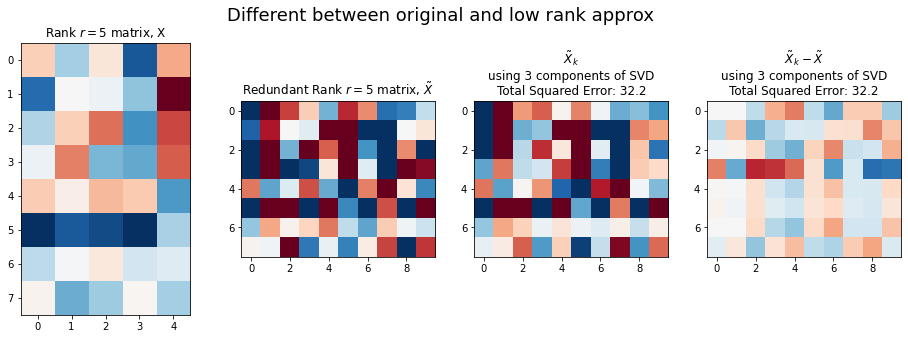

In [178]:
plt.rcParams['image.cmap'] = 'RdBu_r'
np.random.seed(12)

r = 5

# Create a random matrix, which will have independent columns and thus a rank equal to the number of columns
X_orig = np.random.randn(8, r)
orig_rank = la.matrix_rank(X_orig)

# Create a new redundant matrix with twice as many columns, but new columns are
# simply a linear scaling of original matrix
X_redundant = np.hstack([-2 * X_orig, 2 * X_orig])

# Permute columns of redundant matrix
X_redundant = X_redundant[:, np.random.permutation(np.arange(X_redundant.shape[1]))]
X_redundant_rank = la.matrix_rank(X_redundant)

# Run SVD on redundant matrix, we'll use this for LRA
U, S, V = la.svd(X_redundant)

# Low-rank reconstruction (exact in this case)
# change k to k<r to see what a low rank approximation that is not exact looks like
k=3
X_redundant_reconstructed = U[:, :k] * S[:k] @ V[:k, :]
reconstruction_error = np.sum((X_redundant - X_redundant_reconstructed) ** 2)

# Visualizations
## Original matrix
fig, axs = plt.subplots(1, 4, figsize=(16, 5))
plt.sca(axs[0])
plt.imshow(X_orig)
plt.clim([-2, 2])
plt.title(f"Rank $r=${orig_rank} matrix, X")

## Redundant
plt.sca(axs[1])
plt.imshow(X_redundant)
plt.clim([-2, 2])
plt.title(f"Redundant Rank $r=${X_redundant_rank} matrix, $\\tilde X$")

## Low-rank approximation (exact reconstruction)
plt.sca(axs[2])
plt.imshow(X_redundant_reconstructed)
plt.clim([-2, 2])
plt.title(f"$\\tilde X_k$\nusing {k} components of SVD\nTotal Squared Error: {reconstruction_error:1.1f}")
plt.suptitle("Low-Rank Approximation of a Matrix", fontsize=18)

## Low-rank approximation - X_redundant
plt.sca(axs[3])
plt.imshow(X_redundant_reconstructed-X_redundant)
plt.clim([-2, 2])
plt.title(f"$\\tilde X_k-\\tilde X$\nusing {k} components of SVD\nTotal Squared Error: {reconstruction_error:1.1f}")
plt.suptitle("Different between original and low rank approx", fontsize=18)

### Application: Image Compression
Singular value decomposition can be used to decompose any matrix, which allows us to use SVD to compress all sorts of data, including images.
The figure shown below is of my cat Bender Josiah Gibbs. The image is encoded (in grayscale) as a data matrix $A$
with rank $r=138$. 

When SVD is applied to $A$, it returns a set of left singular vectors $U$, right singular vectors $V$, and a diagonal matrix 
$\Sigma$ that contains the singular values associated with the singular vectors.

The singular values in $\Sigma$ (plotted center below) can be used as a proxy for the amount of information 
in $A$ encoded in each component of the decomposition (right figure below).

Text(0.5, 1.0, 'Cumulative % of Information About $X$\nCarried by Singular Vectors')

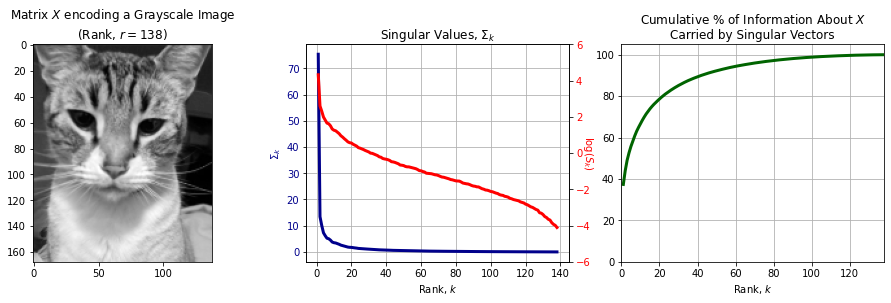

In [209]:
# Load the image of my cat bender
img = plt.imread("bender.png")

# Donwsample and encode RGBa image as matrix of intensities, X
# you can try adjusting the downsample rate
DOWNSAMPLE = 4
R = img[::DOWNSAMPLE, ::DOWNSAMPLE, 0]
G = img[::DOWNSAMPLE, ::DOWNSAMPLE, 1]
B = img[::DOWNSAMPLE, ::DOWNSAMPLE, 2] 
X = 0.2989 * R + 0.5870 * G + 0.1140 * B

# Calculate the rank of the data matrix, X
img_rank = np.linalg.matrix_rank(X, 0.)

# Run SVD on Image
U, S, V = np.linalg.svd(X)

# Calculate the cumulative variance explained by each singular value
total_S = S.sum()
n_components = len(S)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(S) / total_S

# Visualizations
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

## Raw Image, X
plt.sca(axs[0])
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${img_rank})")

## Singular values as function of rank
plt.sca(axs[1])

### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$\Sigma_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $\Sigma_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
plt.sca(axs[2])
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

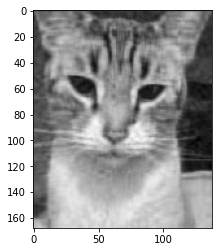

In [210]:
rank=20
U, S, V = la.svd(X)
X_k=U[:,:rank]@np.diag(S[:rank])@V[:rank,:]

plt.imshow(X_k, cmap='gray')

### Saving images at different ranks 

In [213]:
img = Image.open('bender.png')
gray_img = img.convert('L')
gray_img.show()
gray_img.save('bender_gray.png')

In [214]:
a = np.asarray(gray_img)
u, s, v = sla.svd(a)
la.matrix_rank(gray_img), np.shape(gray_img)

(552, (672, 552))

In [215]:
rank = 552
ur = u[:, :rank]
sr = np.matrix(sla.diagsvd(s[:rank], rank,rank))
vr = v[:rank, :]
b = np.asarray(ur*sr*vr)
img2 = Image.fromarray(np.uint8(b))

img2.save('rank_{}.png'.format(str(rank)))
img2.show()

#### Now in color!
you can also do this in color

In [219]:
def svd_low_rank(a,rank):
    u, s, v = sla.svd(a)
    ur = u[:, :rank]
    sr = np.matrix(sla.diagsvd(s[:rank], rank,rank))
    vr = v[:rank, :]
    return np.asarray(ur*sr*vr)

In [222]:
img = Image.open('bender.png') # color bender
w = img.width
h = img.height
A = np.asarray(img)
rank=100 # adjust this value say 2, 20, 100 to see its effects
r = svd_low_rank(A[:,:,0],rank).reshape(w*h)
g = svd_low_rank(A[:,:,1],rank).reshape(w*h)
b = svd_low_rank(A[:,:,2],rank).reshape(w*h)
B = np.asarray([r,g,b]).transpose(1,0).reshape(h,w,3)
img2 = Image.fromarray(np.uint8(B))
img2.show()
